In [67]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from ast import literal_eval
from scipy.stats import anderson

## Functions

In [69]:
def is_lognormal(data):
    test=anderson(data, dist='norm')
    return test.statistic>test.critical_values[2]

def load_fitting_data(number_of_bins:int, fitDataFolder):
    subfolders_fitDataFolder = [ f.path for f in os.scandir(fitDataFolder) if f.is_dir() ]
    lambda_list=list()
    weights_list=list()
    for subfolder in subfolders_fitDataFolder:
        weight_file=[ str(f.path) for f in os.scandir(subfolder) if str(f.path).endswith('HeteroSynapses.dat') ][0]
        weights_table=pd.read_table(weight_file, comment='#').iloc[::,1:-1].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[1]).astype('float32').values[0]
        if weights_table[0] == weights_table[-1] and weights_table[1] == weights_table[-2]:
            continue
        #weights_table.sort()
        lambda_list.append(float(os.path.basename(subfolder).split('_')[6]))
        weights_list.append(list(weights_table))
    fit_data=pd.DataFrame(lambda_list, columns=['lambdas'])
    fit_data['weightData']=weights_list
    fit_data['weightMean']=[np.mean(i) for i in weights_list]
    fit_data['weightVar']=[np.var(i) for i in weights_list]
    fit_data['logNorm']=[is_lognormal(np.log(i)) for i in weights_list]

    _,bins,_=plt.hist(fit_data['weightData'].iloc[25], bins=number_of_bins)
    list_of_histograms=list()
    for i in range(0, len(fit_data['weightData'])):
        histogram,_,_=plt.hist(fit_data['weightData'].iloc[i], bins=bins)
        list_of_histograms.append(list(histogram.tolist()))
    fit_data['binData']=list_of_histograms

    cols=['binData']
    df1 = pd.concat([pd.DataFrame(fit_data[x].values.tolist()).add_prefix(x) for x in cols], axis=1)
    fit_data = pd.concat([df1, fit_data], axis=1)
    return fit_data, bins

def load_test_data(lambda1:float, lambda2:float, bins, subfolder):
    weight_file=[str(f.path) for f in os.scandir(subfolder) if str(f.path).endswith('HeteroSynapses.dat') ][0]
    temp_data=pd.read_table(weight_file, comment='#').iloc[::,1:-1].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[1]).astype('float32')
    time_df=pd.read_table(weight_file, comment='#').iloc[::,0]
    lambda_list_len=round(len(time_df)/2)
    lambda_list=[lambda1]*lambda_list_len
    lambda_list.extend([lambda2]*lambda_list_len)

    list_of_histograms=list()
    list_of_means=list()
    list_of_variance=list()
    list_of_logbools=list()
    for i in range(0, len(time_df)):
        #histogram,_,_=plt.hist(temp_data5d70d0.iloc[i,::], bins=bins)
        #Alternative:
        histogram, _=np.histogram(temp_data.iloc[i,::], bins=bins)
        list_of_histograms.append(list(histogram.tolist()))
        list_of_means.append(np.mean(temp_data.iloc[i,::]))
        list_of_variance.append(np.var(temp_data.iloc[i,::]))
        list_of_logbools.append(is_lognormal(np.log(temp_data.iloc[i,::])))

    test_data=pd.DataFrame(list_of_histograms, columns=["binData"+str(i) for i in range(0,50)])
    test_data['lambdas']=lambda_list
    test_data['time']=time_df
    test_data['weightMean']=list_of_means
    test_data['weightVar']=list_of_variance
    test_data['logNorm']=list_of_logbools
    return test_data

# Load fitting data

C:\Users\anton\AppData\Local\Temp\ipykernel_22928\781107573.py:21: RuntimeWarning: divide by zero encountered in log
  fit_data['logNorm']=[is_lognormal(np.log(i)) for i in weights_list]
c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\scipy\stats\_morestats.py:1948: RuntimeWarning: invalid value encountered in subtract
  w = (y - xbar) / s
c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1605: RuntimeWarning: invalid value encountered in subtract
  x = (asarray(x)-loc) / scale


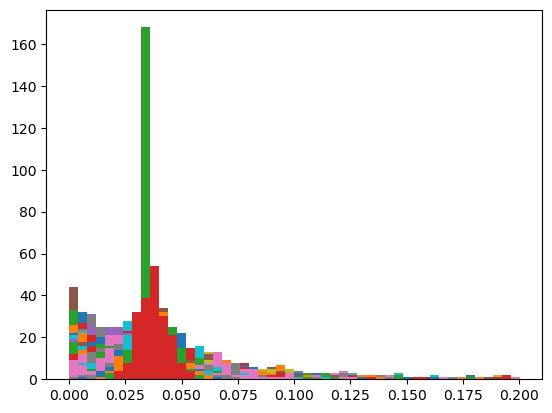

In [70]:
number_of_bins=50
current_wd=os.getcwd()
fitDataFolder=os.path.join(current_wd, 'RegressionData')

fit_data, bins = load_fitting_data(number_of_bins, fitDataFolder)
fit_data.to_csv('fitting_data.csv')


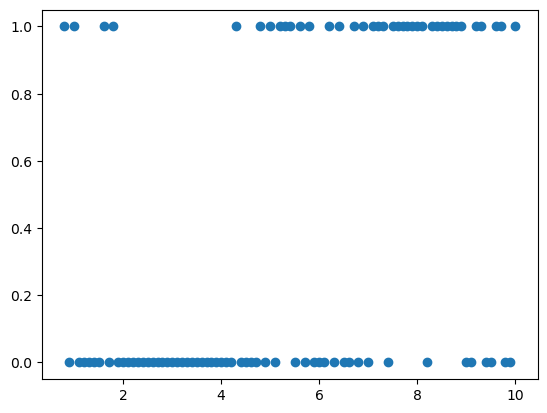

In [72]:
plt.scatter(fit_data['lambdas'], fit_data['logNorm'])

## Load testing data

In [74]:
testDataFolder=os.path.join(current_wd, 'TestData')
lambda1=5.7
lambda2=0.0
subfolders_testDataFolder = [ f.path for f in os.scandir(testDataFolder) if f.is_dir() and "testCorr_5d7" in f.path ]
subfolder=subfolders_testDataFolder[0]
test_data5d70d0=load_test_data(lambda1, lambda2, bins, subfolder)
test_data5d70d0.to_csv('test_data5d70d0.csv')

c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\scipy\stats\_morestats.py:1948: RuntimeWarning: invalid value encountered in subtract
  w = (y - xbar) / s
c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1605: RuntimeWarning: invalid value encountered in subtract
  x = (asarray(x)-loc) / scale


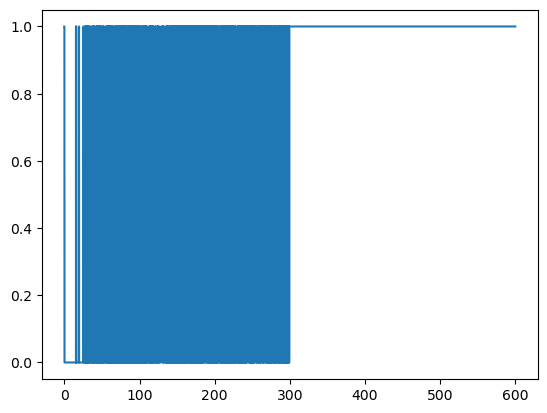

In [79]:
plt.plot(test_data5d70d0['time'], test_data5d70d0['logNorm'])

In [75]:
lambda1=8.9
lambda2=4.6
subfolders_testDataFolder = [ f.path for f in os.scandir(testDataFolder) if f.is_dir() and "testCorr_8d9" in f.path ]
subfolder=subfolders_testDataFolder[0]
test_data8d94d6=load_test_data(lambda1, lambda2, bins, subfolder)
test_data8d94d6.to_csv('test_data8d94d6.csv')

c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\scipy\stats\_morestats.py:1948: RuntimeWarning: invalid value encountered in subtract
  w = (y - xbar) / s
c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1605: RuntimeWarning: invalid value encountered in subtract
  x = (asarray(x)-loc) / scale


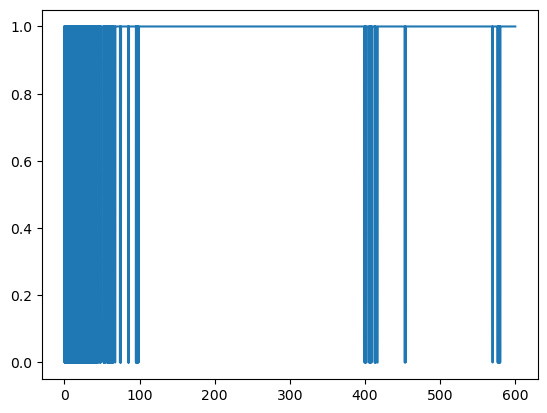

In [80]:
plt.plot(test_data8d94d6['time'], test_data8d94d6['logNorm'])

In [76]:
lambda1=4.6
lambda2=8.9
subfolders_testDataFolder = [ f.path for f in os.scandir(testDataFolder) if f.is_dir() and "testCorr_4d6" in f.path ]
subfolder=subfolders_testDataFolder[0]
test_data4d68d9=load_test_data(lambda1, lambda2, bins, subfolder)
test_data4d68d9.to_csv('test_data4d68d9.csv')

c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\scipy\stats\_morestats.py:1948: RuntimeWarning: invalid value encountered in subtract
  w = (y - xbar) / s
c:\Users\anton\anaconda3\envs\lambdaCorrelation\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1605: RuntimeWarning: invalid value encountered in subtract
  x = (asarray(x)-loc) / scale


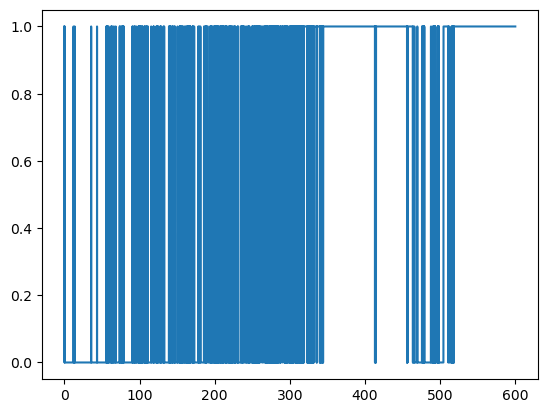

In [81]:
plt.plot(test_data4d68d9['time'], test_data4d68d9['logNorm'])

## Load by reading

In [26]:

fit_data=pd.read_csv('fitting_data.csv', index_col=0)
fit_data['weightData']=fit_data['weightData'].map(literal_eval)
test_data5d70d0=pd.read_csv('test_data5d70d0.csv', index_col=0)
test_data8d94d6=pd.read_csv('test_data8d94d6.csv', index_col=0)
test_data4d68d9=pd.read_csv('test_data4d68d9.csv', index_col=0)
#fit_data['weightData']=fit_data['weightData'].map(literal_eval)

## Fitting

In [28]:
X_fit=pd.DataFrame(fit_data.drop(columns=['lambdas', 'weightData', 'weightMean', 'weightVar', 'binData']))
Y_fit=fit_data['lambdas']

regression=linear_model.LinearRegression()
regression.fit(X_fit, Y_fit)

X_fit=pd.DataFrame(fit_data['weightMean'])
Y_fit=fit_data['lambdas']

regression_mean=linear_model.LinearRegression()
regression_mean.fit(X_fit, Y_fit)

X_fit=pd.DataFrame(fit_data['weightVar'])
Y_fit=fit_data['lambdas']

regression_variance=linear_model.LinearRegression()
regression_variance.fit(X_fit, Y_fit)

LinearRegression()

In [20]:
print("Coefficients: \n", regression.coef_)
print(regression.intercept_)

Coefficients: 
 [-0.05760142 -0.0804519  -0.06758239 -0.04026326 -0.03274714 -0.01273081
 -0.02492592  0.01119792 -0.04780278  0.03534074  0.03754847  0.04413023
 -0.01554377 -0.01586098  0.0706561   0.04108915 -0.00777673  0.12998375
 -0.09494679  0.10583401  0.08238865  0.04026842 -0.05411025  0.11174043
  0.1417842   0.15937377 -0.2144864  -0.09605648 -0.21844238 -0.59764245
  0.36756345  0.04499566 -0.11603461 -0.27069999 -0.0559555  -0.09658628
 -0.28558279 -0.63508626 -0.4430805  -1.18011316 -0.24876335 -0.19559997
 -0.18374169  0.89454246 -0.39782689 -0.28691956  0.18837054 -0.52055967
  0.58419576 -0.68924469]
8.27370663013455


## Testing first dataset

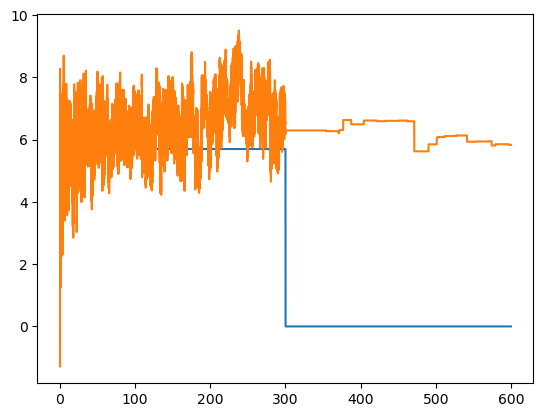

In [29]:
X_test1=pd.DataFrame(test_data5d70d0.drop(columns=['lambdas', 'time', 'weightMean', 'weightVar']))
Y_test1=test_data5d70d0['lambdas']
Y_pred1=list()
Y_pred1.extend(regression.predict(X_test1))

plt.plot(test_data5d70d0['time'], Y_test1)
plt.plot(test_data5d70d0['time'], Y_pred1)
plt.show()

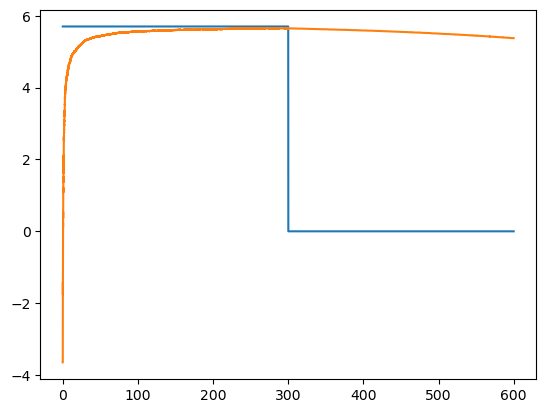

In [30]:
X_test1=pd.DataFrame(test_data5d70d0['weightMean'])
Y_test1=test_data5d70d0['lambdas']
Y_pred1=list()
Y_pred1.extend(regression_mean.predict(X_test1))

plt.plot(test_data5d70d0['time'], Y_test1)
plt.plot(test_data5d70d0['time'], Y_pred1)
plt.show()

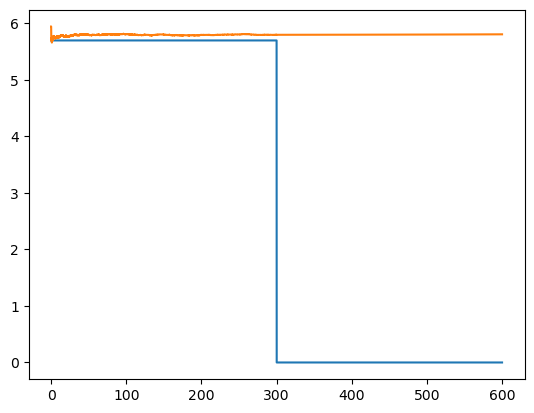

In [31]:
X_test1=pd.DataFrame(test_data5d70d0['weightVar'])
Y_test1=test_data5d70d0['lambdas']
Y_pred1=list()
Y_pred1.extend(regression_variance.predict(X_test1))

plt.plot(test_data5d70d0['time'], Y_test1)
plt.plot(test_data5d70d0['time'], Y_pred1)
plt.show()

## Testing second dataset

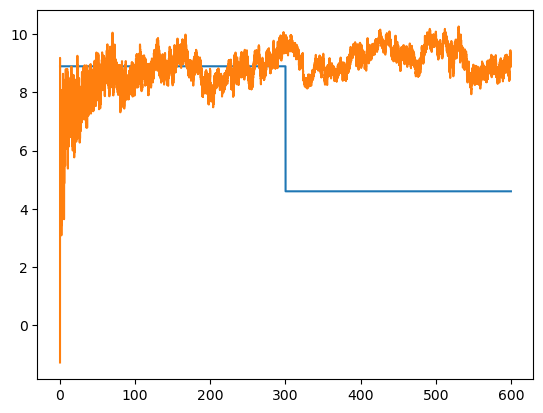

In [84]:
X_test2=pd.DataFrame(test_data8d94d6.drop(columns=['lambdas', 'time', 'weightMean', 'weightVar', 'logNorm']))
Y_test2=test_data8d94d6['lambdas']
Y_pred2=list()
Y_pred2.extend(regression.predict(X_test2))

plt.plot(test_data8d94d6['time'], Y_test2)
plt.plot(test_data8d94d6['time'], Y_pred2)
plt.show()

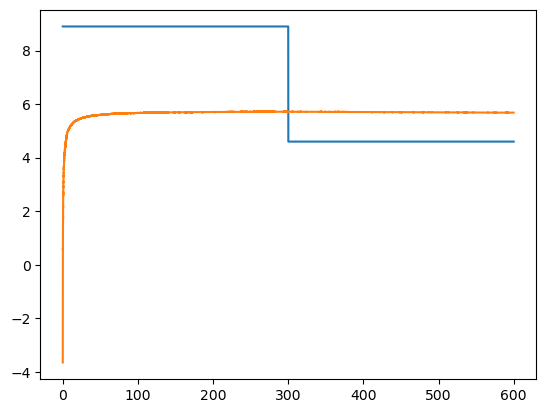

In [32]:
X_test2=pd.DataFrame(test_data8d94d6['weightMean'])
Y_test2=test_data8d94d6['lambdas']
Y_pred2=list()
Y_pred2.extend(regression_mean.predict(X_test2))

plt.plot(test_data8d94d6['time'], Y_test2)
plt.plot(test_data8d94d6['time'], Y_pred2)
plt.show()

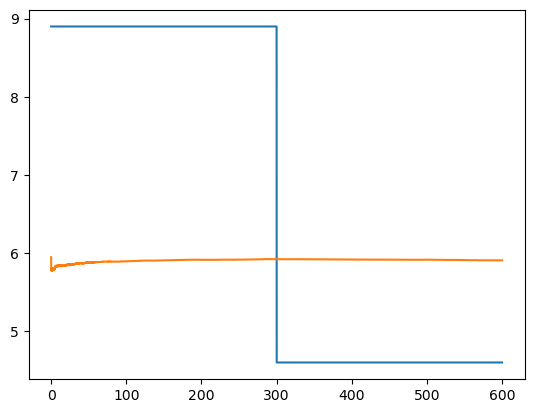

In [33]:
X_test2=pd.DataFrame(test_data8d94d6['weightVar'])
Y_test2=test_data8d94d6['lambdas']
Y_pred2=list()
Y_pred2.extend(regression_variance.predict(X_test2))

plt.plot(test_data8d94d6['time'], Y_test2)
plt.plot(test_data8d94d6['time'], Y_pred2)
plt.show()

## Testing third dataset

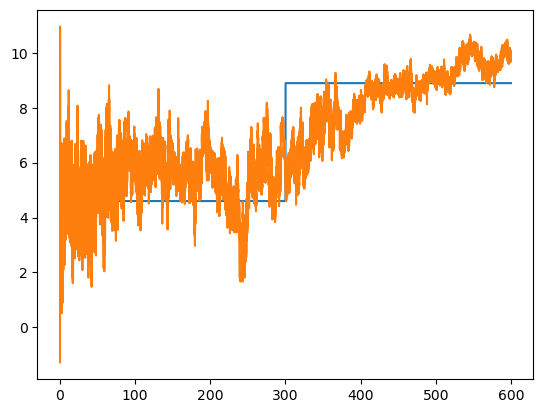

In [86]:
X_test2=pd.DataFrame(test_data4d68d9.drop(columns=['lambdas', 'time', 'weightMean', 'weightVar', 'logNorm']))
Y_test2=test_data4d68d9['lambdas']
Y_pred2=list()
Y_pred2.extend(regression.predict(X_test2))

plt.plot(test_data4d68d9['time'], Y_test2)
plt.plot(test_data4d68d9['time'], Y_pred2)
plt.show()

## Other plots

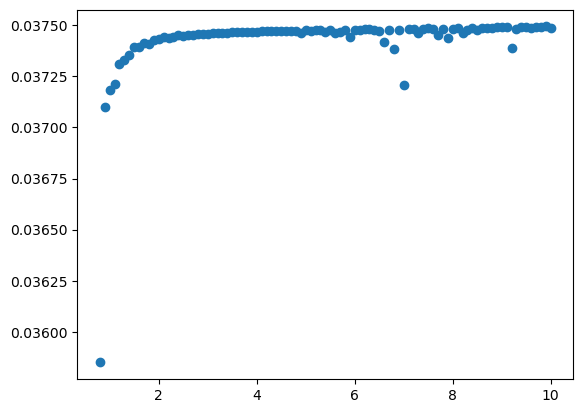

In [39]:
plt.scatter(fit_data['lambdas'],fit_data['weightMean'])

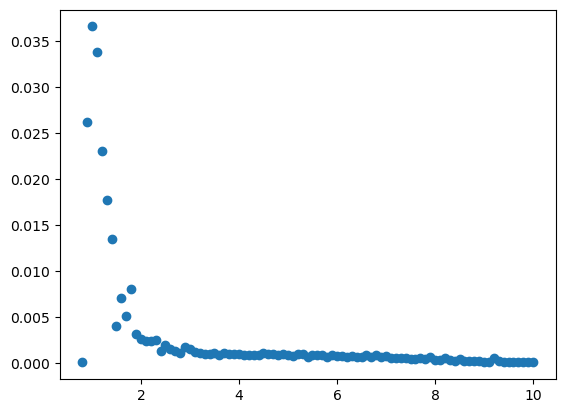

In [40]:
plt.scatter(fit_data['lambdas'],fit_data['weightVar'])

## Curve fitting

In [89]:
from scipy.optimize import curve_fit

[1.08103234e+00 1.24053476e-01 1.69685469e+05]


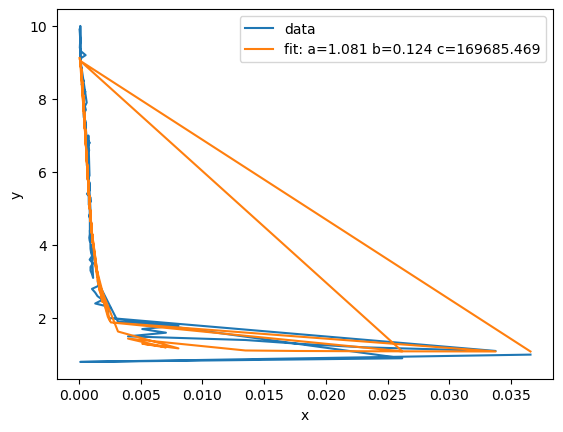

In [119]:
def f(x, a,b,c):
    return a+1/(b+c*x**2)
popt, pcov = curve_fit(f,fit_data['weightVar'].to_numpy(),fit_data['lambdas'].to_numpy())
print(popt)
plt.plot(fit_data['weightVar'],fit_data['lambdas'], label='data')
plt.plot(fit_data['weightVar'], f(fit_data['weightVar'], *popt),
         label='fit: a=%5.3f b=%5.3f c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

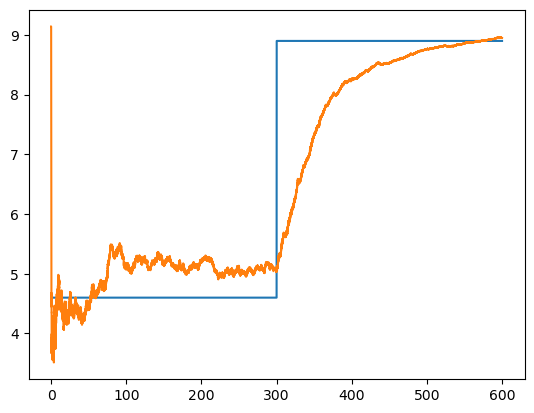

In [118]:
plt.plot(test_data4d68d9['time'],test_data4d68d9['lambdas'], label='data')
plt.plot(test_data4d68d9['time'], f(test_data4d68d9['weightVar'], *popt),
         label='fit: a=%5.3f b=%5.3f c=%5.3f' % tuple(popt))

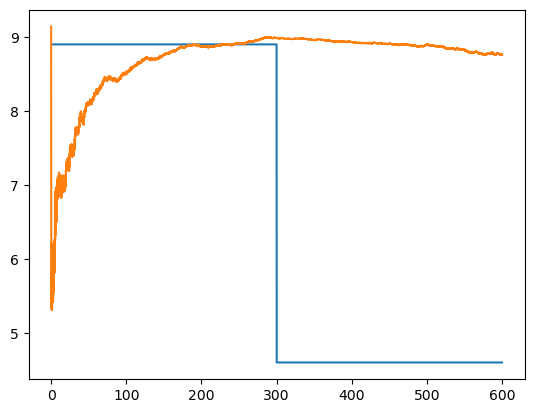

In [120]:
plt.plot(test_data8d94d6['time'],test_data8d94d6['lambdas'], label='data')
plt.plot(test_data8d94d6['time'], f(test_data8d94d6['weightVar'], *popt),
         label='fit: a=%5.3f b=%5.3f c=%5.3f' % tuple(popt))

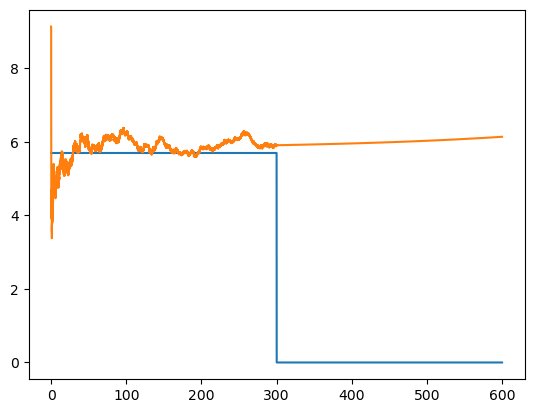

In [121]:
plt.plot(test_data5d70d0['time'],test_data5d70d0['lambdas'], label='data')
plt.plot(test_data5d70d0['time'], f(test_data5d70d0['weightVar'], *popt),
         label='fit: a=%5.3f b=%5.3f c=%5.3f' % tuple(popt))

[1.28644735e-01 9.74660740e-02 1.18420559e+02]


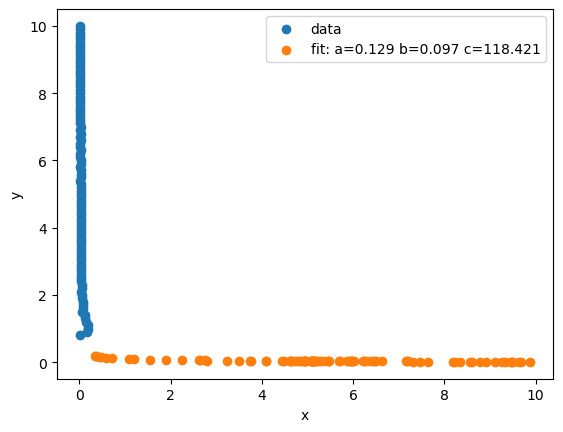

In [109]:
X_std = np.sqrt(fit_data['weightVar'].to_numpy())
def f(x, a,b,c):
    return a+1/(b+c*x**2)
popt, pcov = curve_fit(f,X_std,fit_data['lambdas'].to_numpy())
print(popt)
plt.scatter(X_std,fit_data['lambdas'], label='data')
plt.scatter( f(X_std, *popt), X_std,
         label='fit: a=%5.3f b=%5.3f c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()